# CO<sub>2</sub> Emissions per Vehicle: Polynomial Regression
## Summary
This is the third and final part of the 'CO<sub>2</sub> Emissions per Vehicle' analysis in which we will be attempting to find a model that best fits our <a href="https://github.com/tabburn/CO2-emissions-by-vehicle/blob/main/resources/2023fuelconsumptionCO2.csv">data</a> (provided by the Canadian government) in order to predict emissions of future vehicles. In this section we'll be taking a look at how our data fits a polynomial regression. We will also explore what degree best fits the data by observing the line itself and by also interpreting certain metrics per order (quadratic and cubic).
## Importing Libraries and Data

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

from sklearn.metrics import r2_score

In [135]:
df = pd.read_csv(r'C:\Users\tiffa\Documents\GitHub\CO2-emissions-by-vehicle\resources\2023fuelconsumptionCO2.csv')

In [136]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2_rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4


In [137]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS', 'CO2_rating'],
      dtype='object')

In [138]:
# changing column names from uppercase to lowercase for convenience
df.columns = df.columns.str.lower()

In [139]:
# extracting specific columns and assigning to a new dataframe
cdf = df[['enginesize', 'cylinders', 'fuelconsumption_comb', 'co2emissions']]
cdf.head(9)

,enginesize,cylinders,fuelconsumption_comb,co2emissions
0,1.5,4,7.2,167
1,1.5,4,7.4,172
2,1.5,4,7.8,181
3,3.5,6,11.2,263
4,3.0,6,12.4,291
5,2.0,4,9.9,232
6,2.0,4,10.3,242
7,2.0,4,9.8,230
8,2.0,4,9.8,231


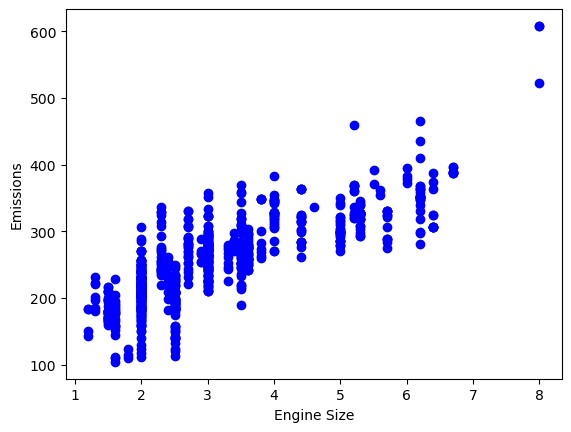

In [140]:
# plotting 'co2emissions' with respect to 'enginesize'
plt.scatter(cdf.enginesize, cdf.co2emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Splitting and Training
Like we did in the first two sections, we'll begin by splitting the dataset into training and testing sets for our model. We'll split the dataset randomly using np.random.rand() with 80% of the dataset being using for training and 20% for testing. To do this we'll create a mask that accounts for a random 80% chunk of our dataframe and assign it to a 'train' set then use the rest for our 'test' set (20%).

In [141]:
# splitting the data 80:20
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Quadratic Model
First we'll create a quadratic model where the polynomial has a degree of 2.

In [142]:
# further splitting the training and testing data
train_x = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['co2emissions']])

test_x = np.asanyarray(test[['enginesize']])
test_y = np.asanyarray(test[['co2emissions']])

# creating a second degree polynomial
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

In [143]:
# creating the linear regression
LR = linear_model.LinearRegression()
train_y1 = LR.fit(train_x_poly, train_y)

# printing the coefficients
print(f'The coefficients are: {LR.coef_}')
print(f'The intercept is: {LR.intercept_}')

The coefficients are: [[ 0.         48.04749105 -1.24362829]]
The intercept is: [119.0790162]


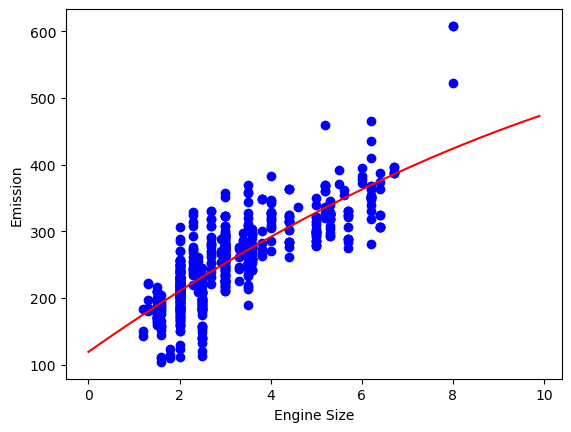

In [144]:
# plotting
plt.scatter(train.enginesize, train.co2emissions, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = LR.intercept_[0]+ LR.coef_[0][1]*XX+ LR.coef_[0][2]*np.power(XX,2)

plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

### Model Evaluation
Finally we'll evaluate how well the model performs against our data. We'll do this by using the 'r2_score' metric from the 'sci-kit learn' library which I've imported in the first section.

In [145]:
# looking at the metrics
test_x_poly = poly.transform(test_x)
test_y1 = LR.predict(test_x_poly)

print(f'The mean absolute error is: {np.mean(np.absolute(test_y1 - test_y))}')
print(f'The residual sum of squares (MSE) is: {np.mean(test_y1 - test_y)**2}')
print(f'The r2-score is: {r2_score(test_y, test_y1)}')

The mean absolute error is: 27.84036557277321
The residual sum of squares (MSE) is: 16.48331987423813
The r2-score is: 0.5946819657715278


As we can see, this model doesn't perform very well. Actually, the r<sup>2</sup> value is similar to the r<sup>2</sup> value we found when doing simple linear regression in a previous notebook. Let's try changing the order (degree) of our polynomial to see if we can get a better fit.
## Cubic Model
This time we'll create a cubic model where the polynomial has a degree of 3.

The coefficients are: [[  0.         169.89826987 -34.32547263   2.69941188]]
The intercept is: [-13.90331482]


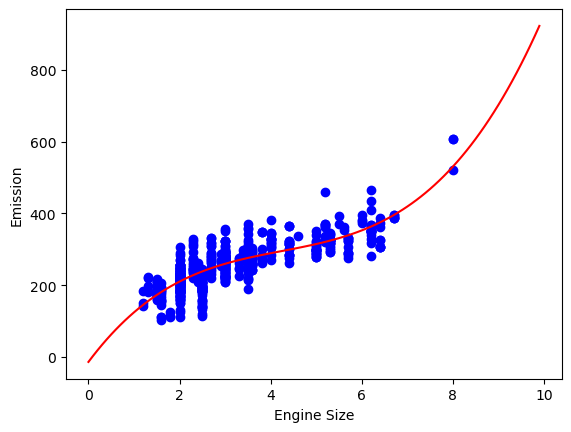

In [146]:
# creating a new model to the third degree
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
LR3 = linear_model.LinearRegression()
train_y3 = LR3.fit(train_x_poly3, train_y)

# the coefficients
print(f'The coefficients are: {LR3.coef_}')
print(f'The intercept is: {LR3.intercept_}')

# plotting the new fit
plt.scatter(train.enginesize, train.co2emissions, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = LR3.intercept_[0]+ LR3.coef_[0][1]*XX+ LR3.coef_[0][2]*np.power(XX,2)+ LR3.coef_[0][3]*np.power(XX,3)

plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()


### Model Evaluation

In [149]:
# looking at the metrics
test_x_poly3 = poly3.transform(test_x)
test_y3 = LR3.predict(test_x_poly3)

print(f'The mean absolute error is: {np.mean(np.absolute(test_y3 - test_y))}')
print(f'The residual sum of squares (MSE) is: {np.mean(test_y3 - test_y)**2}')
print(f'The r2-score is: {r2_score(test_y, test_y3)}')

The mean absolute error is: 26.408019504964173
The residual sum of squares (MSE) is: 18.69790199114554
The r2-score is: 0.6015314516889001


## Conclusion
As we can see from above, our cubic model fits the data much better than our quadratic model and especially our simple linear regression model. However, our r<sup>2</sup> value is still similar, suggesting that all three models don't account for the variance in data very well. The variance in our data was best explained using multiple linear regression with 'enginesize', 'cylinders', and 'fuelconsumption_comb' relating to 'co2emissions' which was seen in the previous notebook.

(end)